# Importing the Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice
import warnings
warnings.filterwarnings("ignore")

# Cloning YoloV5 

In [ ]:
%pwd

In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16531, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 16531 (delta 1), reused 5 (delta 0), pack-reused 16522
Receiving objects: 100% (16531/16531), 15.05 MiB | 31.02 MiB/s, done.
Resolving deltas: 100% (11354/11354), done.


In [ ]:
%cd yolov5/

# Installing YoloV5 requirements files

In [ ]:
!pip install -r requirements.txt --quiet

In [7]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
crs_path = r"content/drive/MyDrive/yolov5/train/images"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
    for filename in files:
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("Training images are : ",count_for_train)
print("Validation images are : ",count_for_val)

Training images are :  3297
Validation images are :  824


In [8]:
print(f"Total no. of images: {len(imgs)}")

Total no. of images: 4122


In [ ]:
directory = os.getcwd()
directory

In [10]:
train_image_path = "train/images"
train_label_path = "train/labels"
val_image_path = "valid/images"
val_label_path = "valid/labels"

# Create directories if they don't exist
for folder in [train_image_path, train_label_path, val_image_path, val_label_path]:
    os.makedirs(folder, exist_ok=True)

In [11]:
files = list(zip(imgs, xmls))

# Copy files for train and test directories
for x in range(count_for_train):
    file_jpg, file_xml = choice(files)
    shutil.copy(os.path.join(crs_path, file_jpg), os.path.join(train_image_path, file_jpg))
    shutil.copy(os.path.join(crs_path, file_xml), os.path.join(train_label_path, file_xml))
    files.remove((file_jpg, file_xml))

for file_jpg, file_xml in files:
    shutil.copy(os.path.join(crs_path, file_jpg), os.path.join(val_image_path, file_jpg))
    shutil.copy(os.path.join(crs_path, file_xml), os.path.join(val_label_path, file_xml))
    
print(f"Train images:{len(os.listdir(train_image_path))}\nTrain labels:{len(os.listdir(train_label_path))}\nValidation images:{len(os.listdir(val_image_path))}\nValidation lables:{len(os.listdir(val_label_path))}")

Train images:3297
Train labels:3297
Validation images:825
Validation lables:825


In [12]:
yaml_dir = os.path.normpath('content/drive/MyDrive/yolov5/data.yaml')

# Loading dataset

In [13]:
with open(yaml_dir,'r') as file:
    lines = file.readlines()
    print(lines)

['train: ../train/images\n', 'val: ../valid/images\n', 'test: ../test/images\n', '\n', 'nc: 5\n', "names: ['NO_DR', 'MILD', 'MODERATE', 'SEVERE', 'PROLIFERATE_DR']\n", '\n', 'roboflow:\n', '  workspace: diabeticretinopathy\n', '  project: diabeticretinopathyfinal\n', '  version: 3\n', '  license: CC BY 4.0\n', '  url: https://universe.roboflow.com/diabeticretinopathy/diabeticretinopathyfinal/dataset/3\n']


# Training the YoloV5 model

In [14]:
num_gpus = torch.cuda.device_count()

if num_gpus > 0:
    print("Number of available GPUs:", num_gpus)
    print("GPU Locations:")
    for i in range(num_gpus):
        gpu_properties = torch.cuda.get_device_properties(i)
        print(f"GPU {i}: {gpu_properties.name}")
else:
    print("No GPUs available.")

Number of available GPUs: 2
GPU Locations:
GPU 0: Tesla T4
GPU 1: Tesla T4


In [15]:
!wandb disabled
# Single GPU training
# !python train.py --img 415 --batch 32 --epochs 100 --data content/drive/MyDrive/yolov5/data.yaml --weights yolov5s.pt --cache --workers 2
# Multi GPU training
!python -m torch.distributed.run --nproc_per_node 2 train.py --img 416 --batch 64 --epochs 200 --data content/drive/MyDrive/yolov5/data.yaml --weights yolov5s.pt --cache --workers 2 --device 0,1

W&B disabled.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-04-13 19:04:53.279087: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 19:04:53.279102: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 19:04:53.279160: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 19:04:53.279203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already

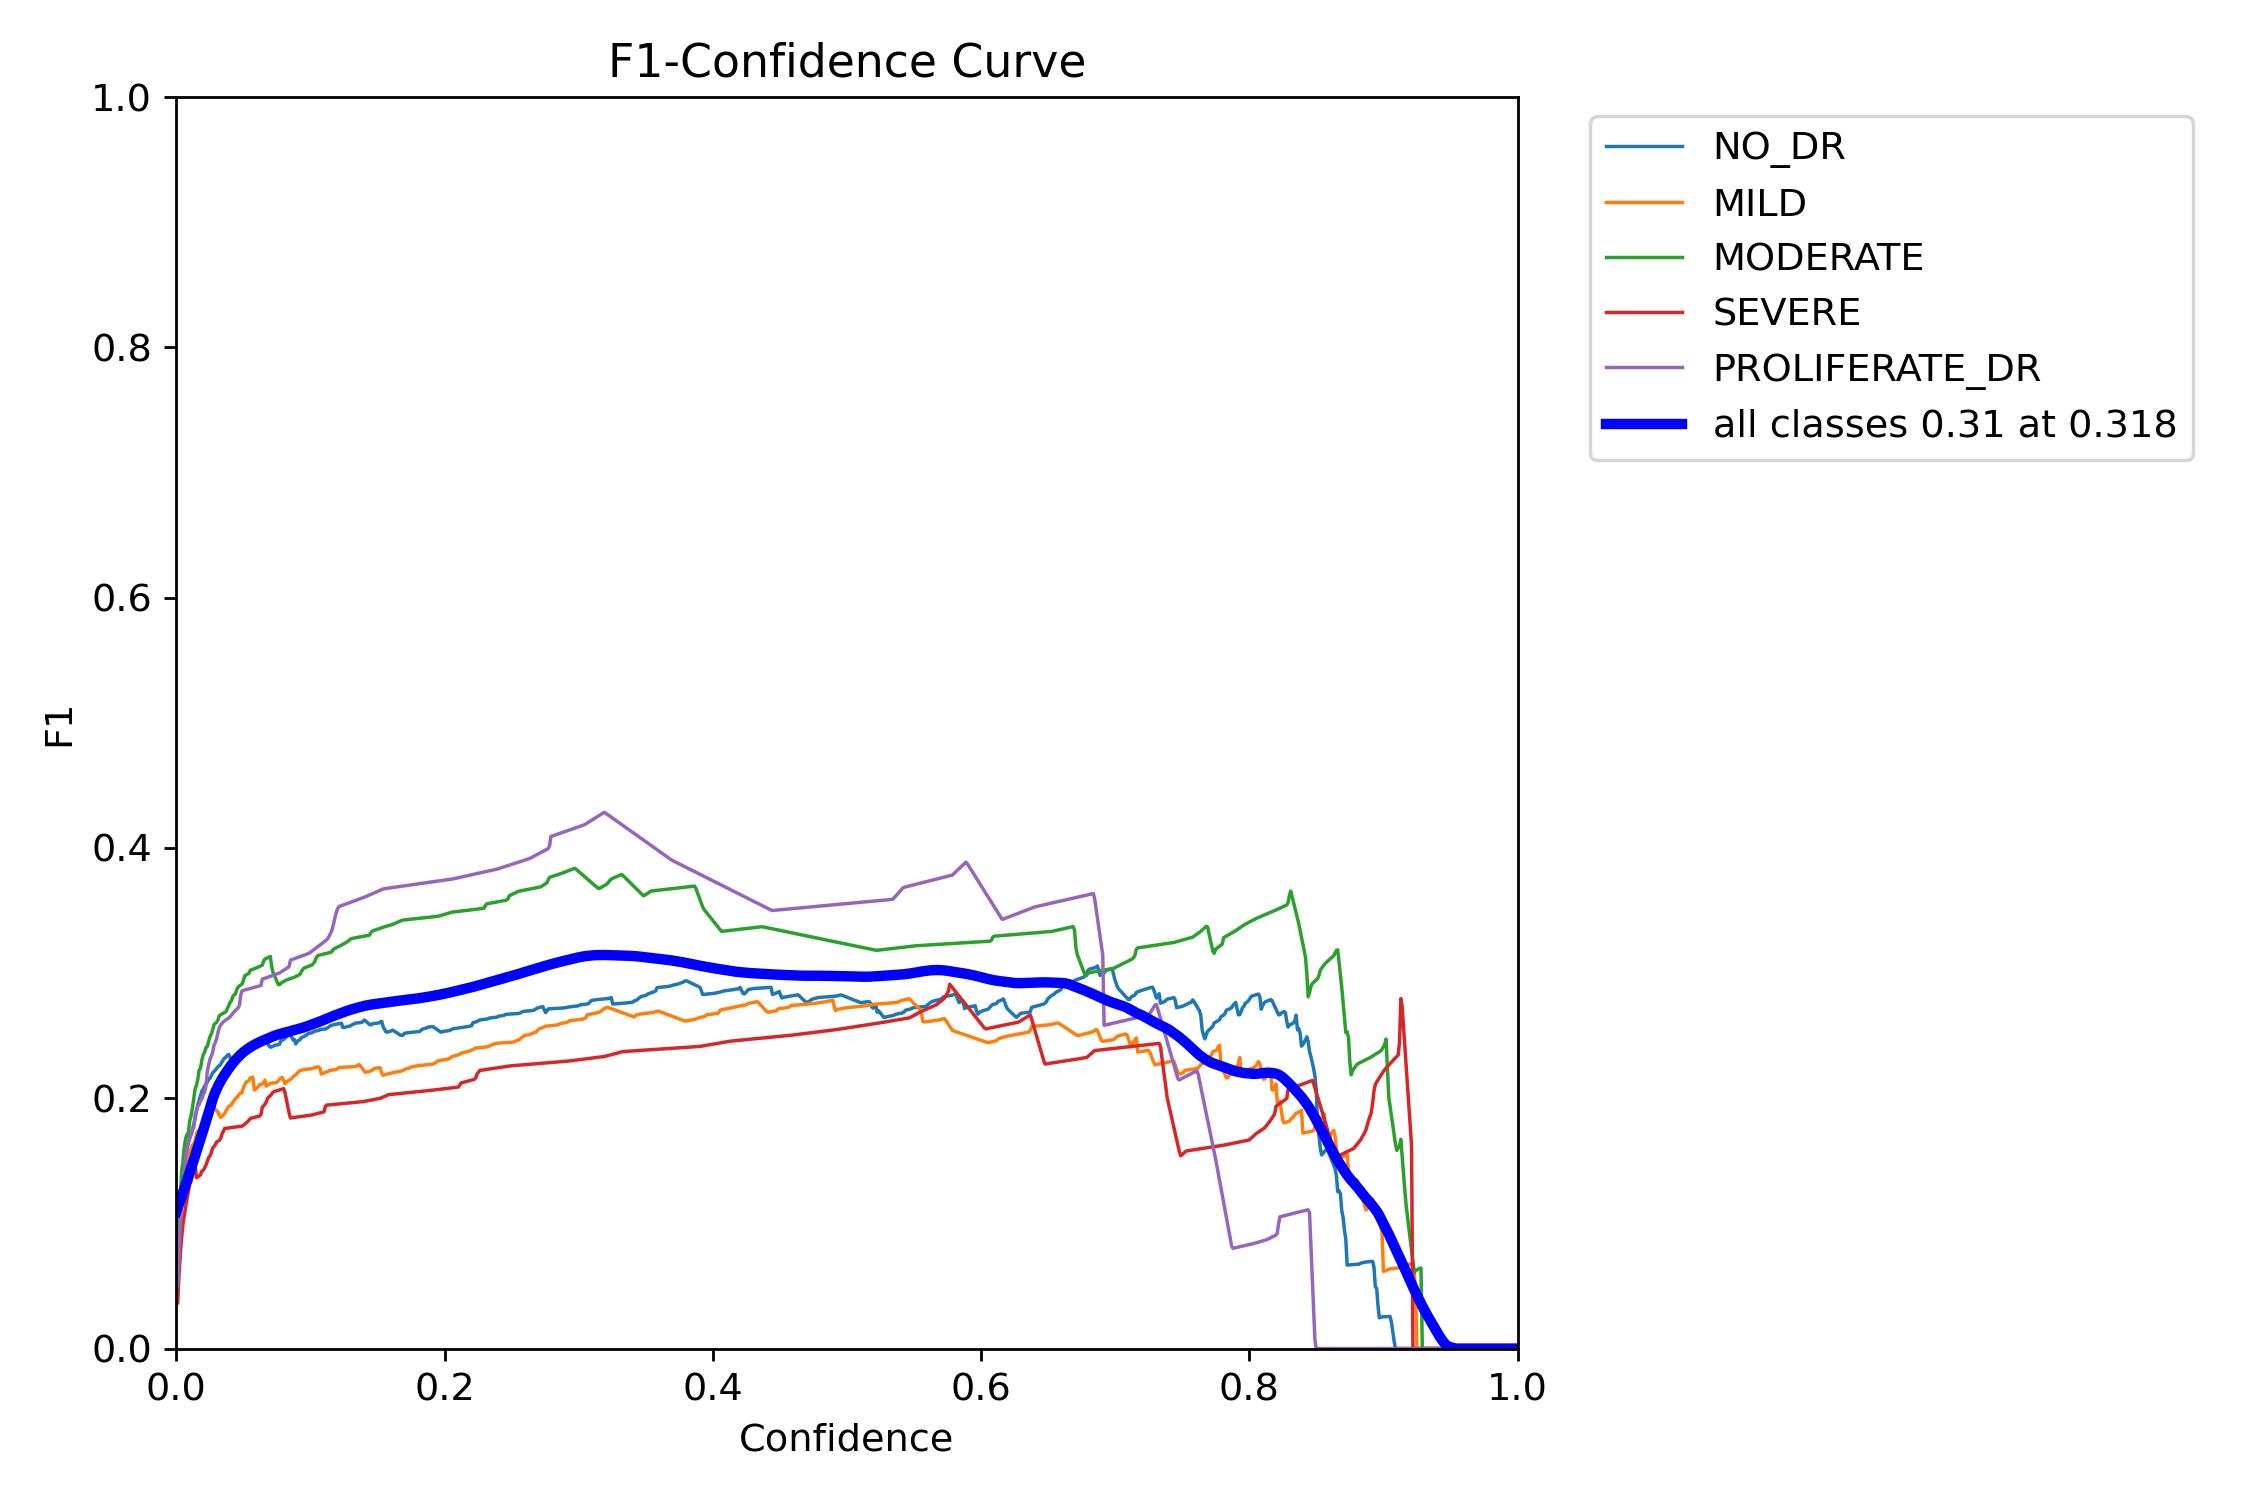

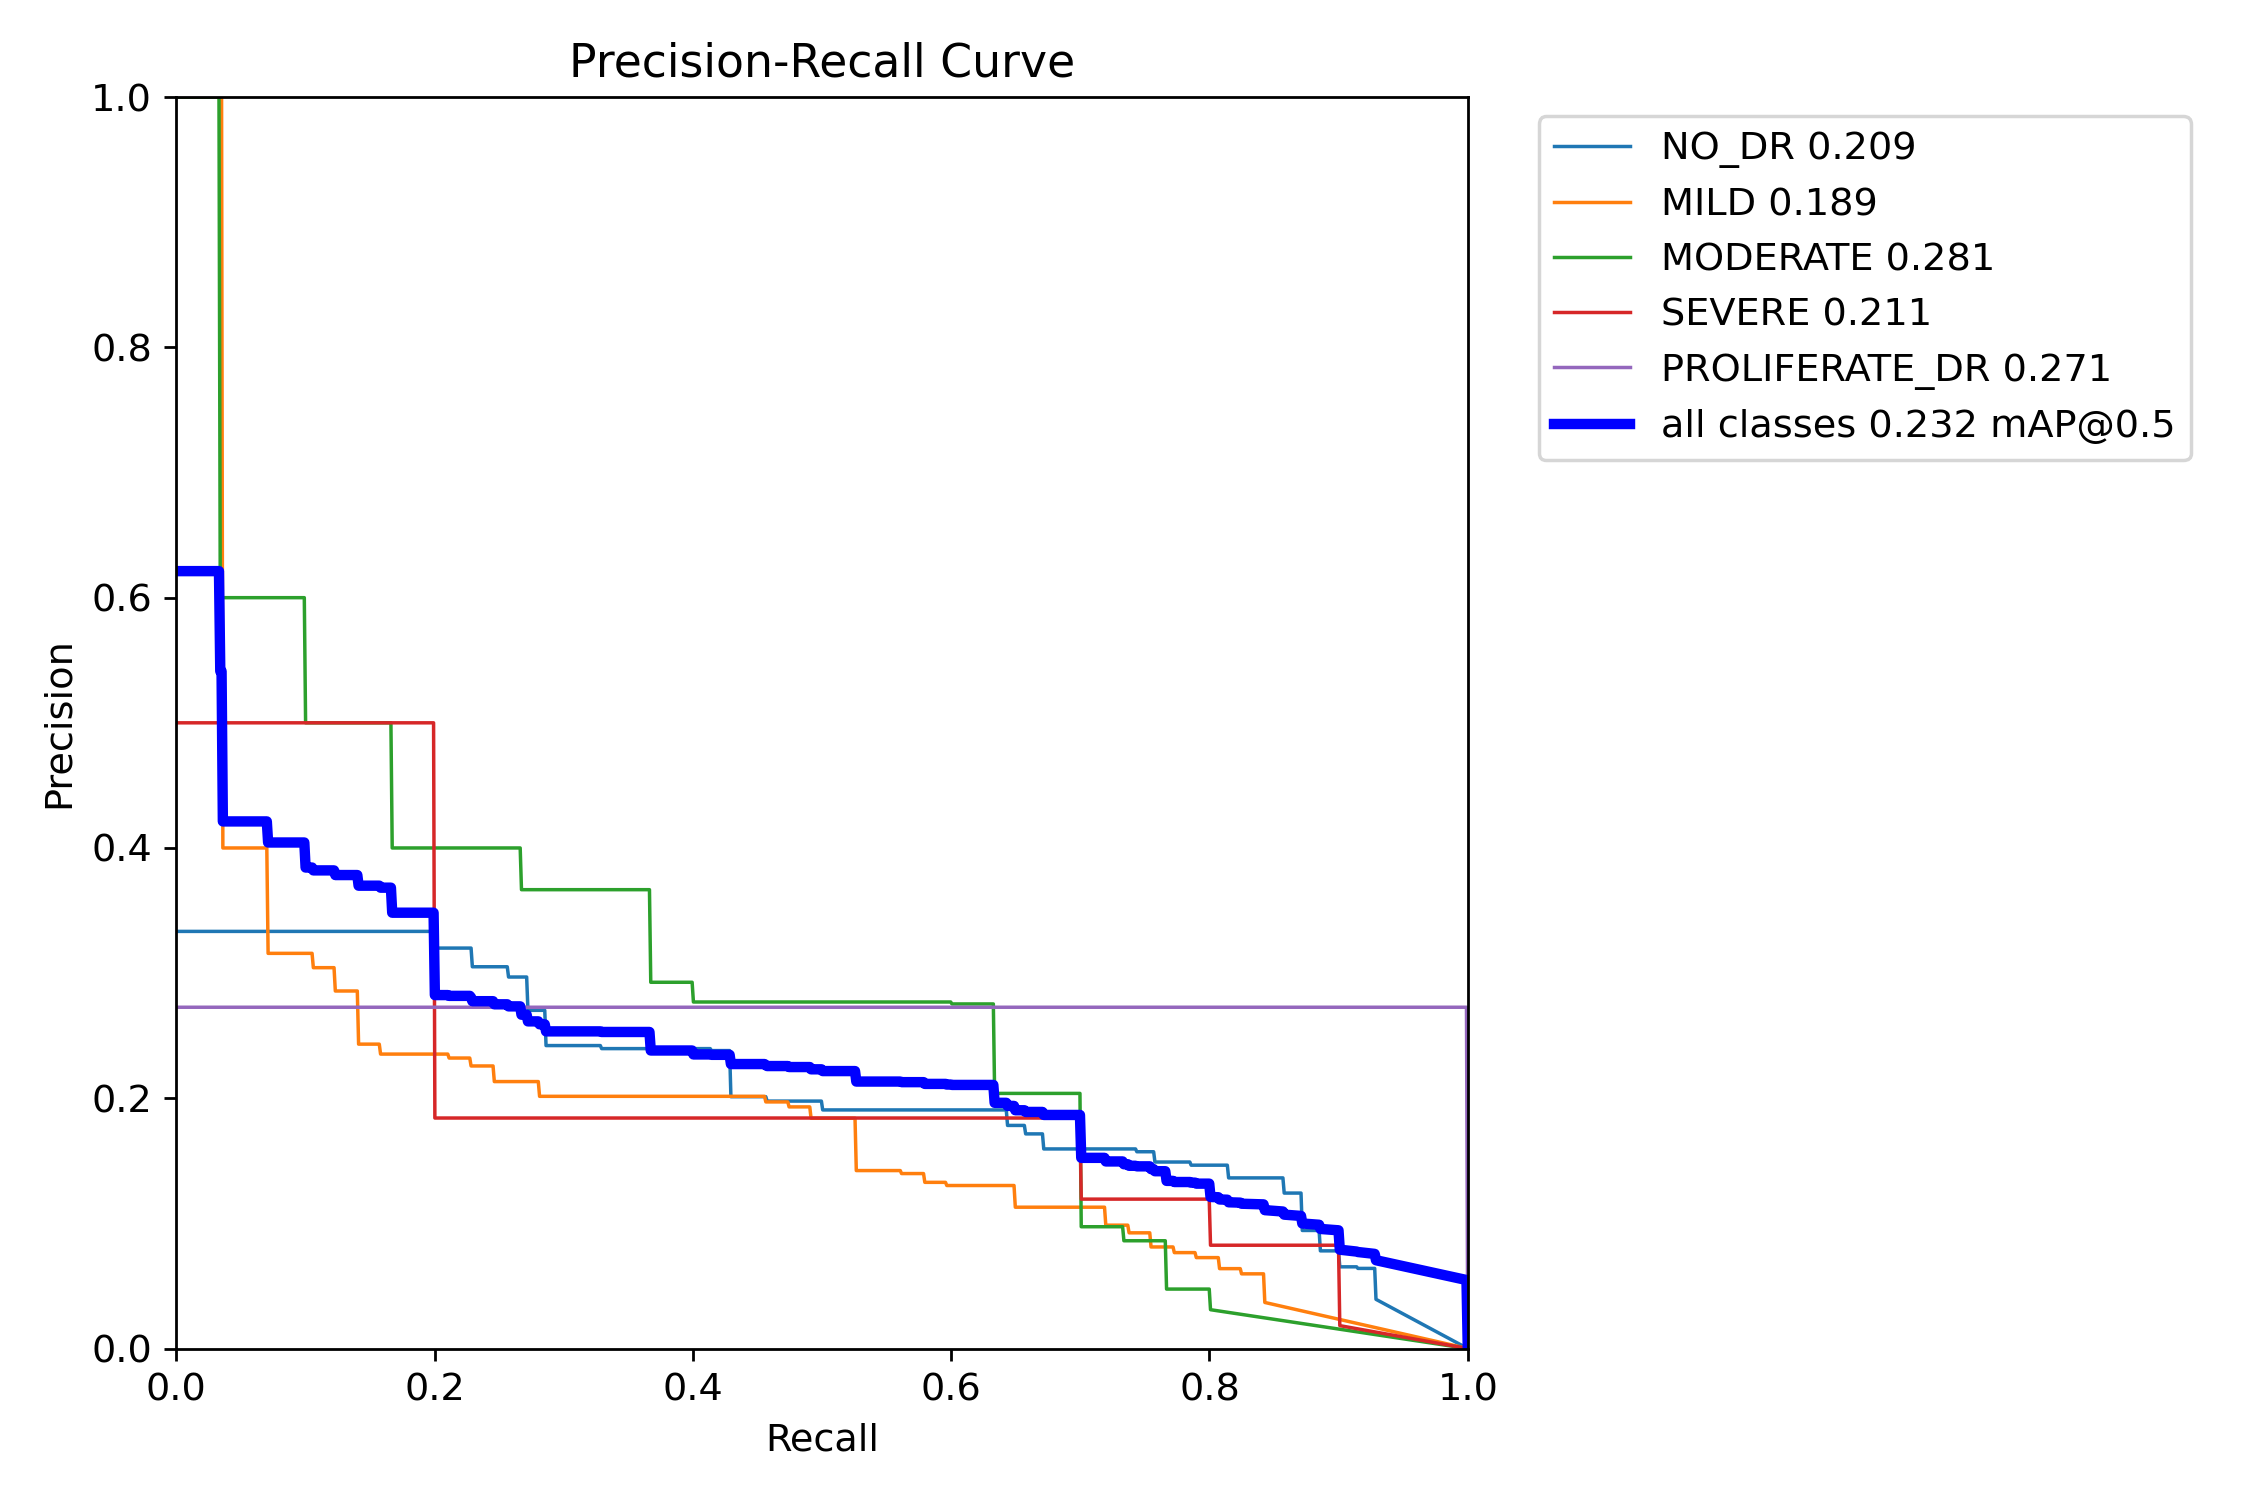

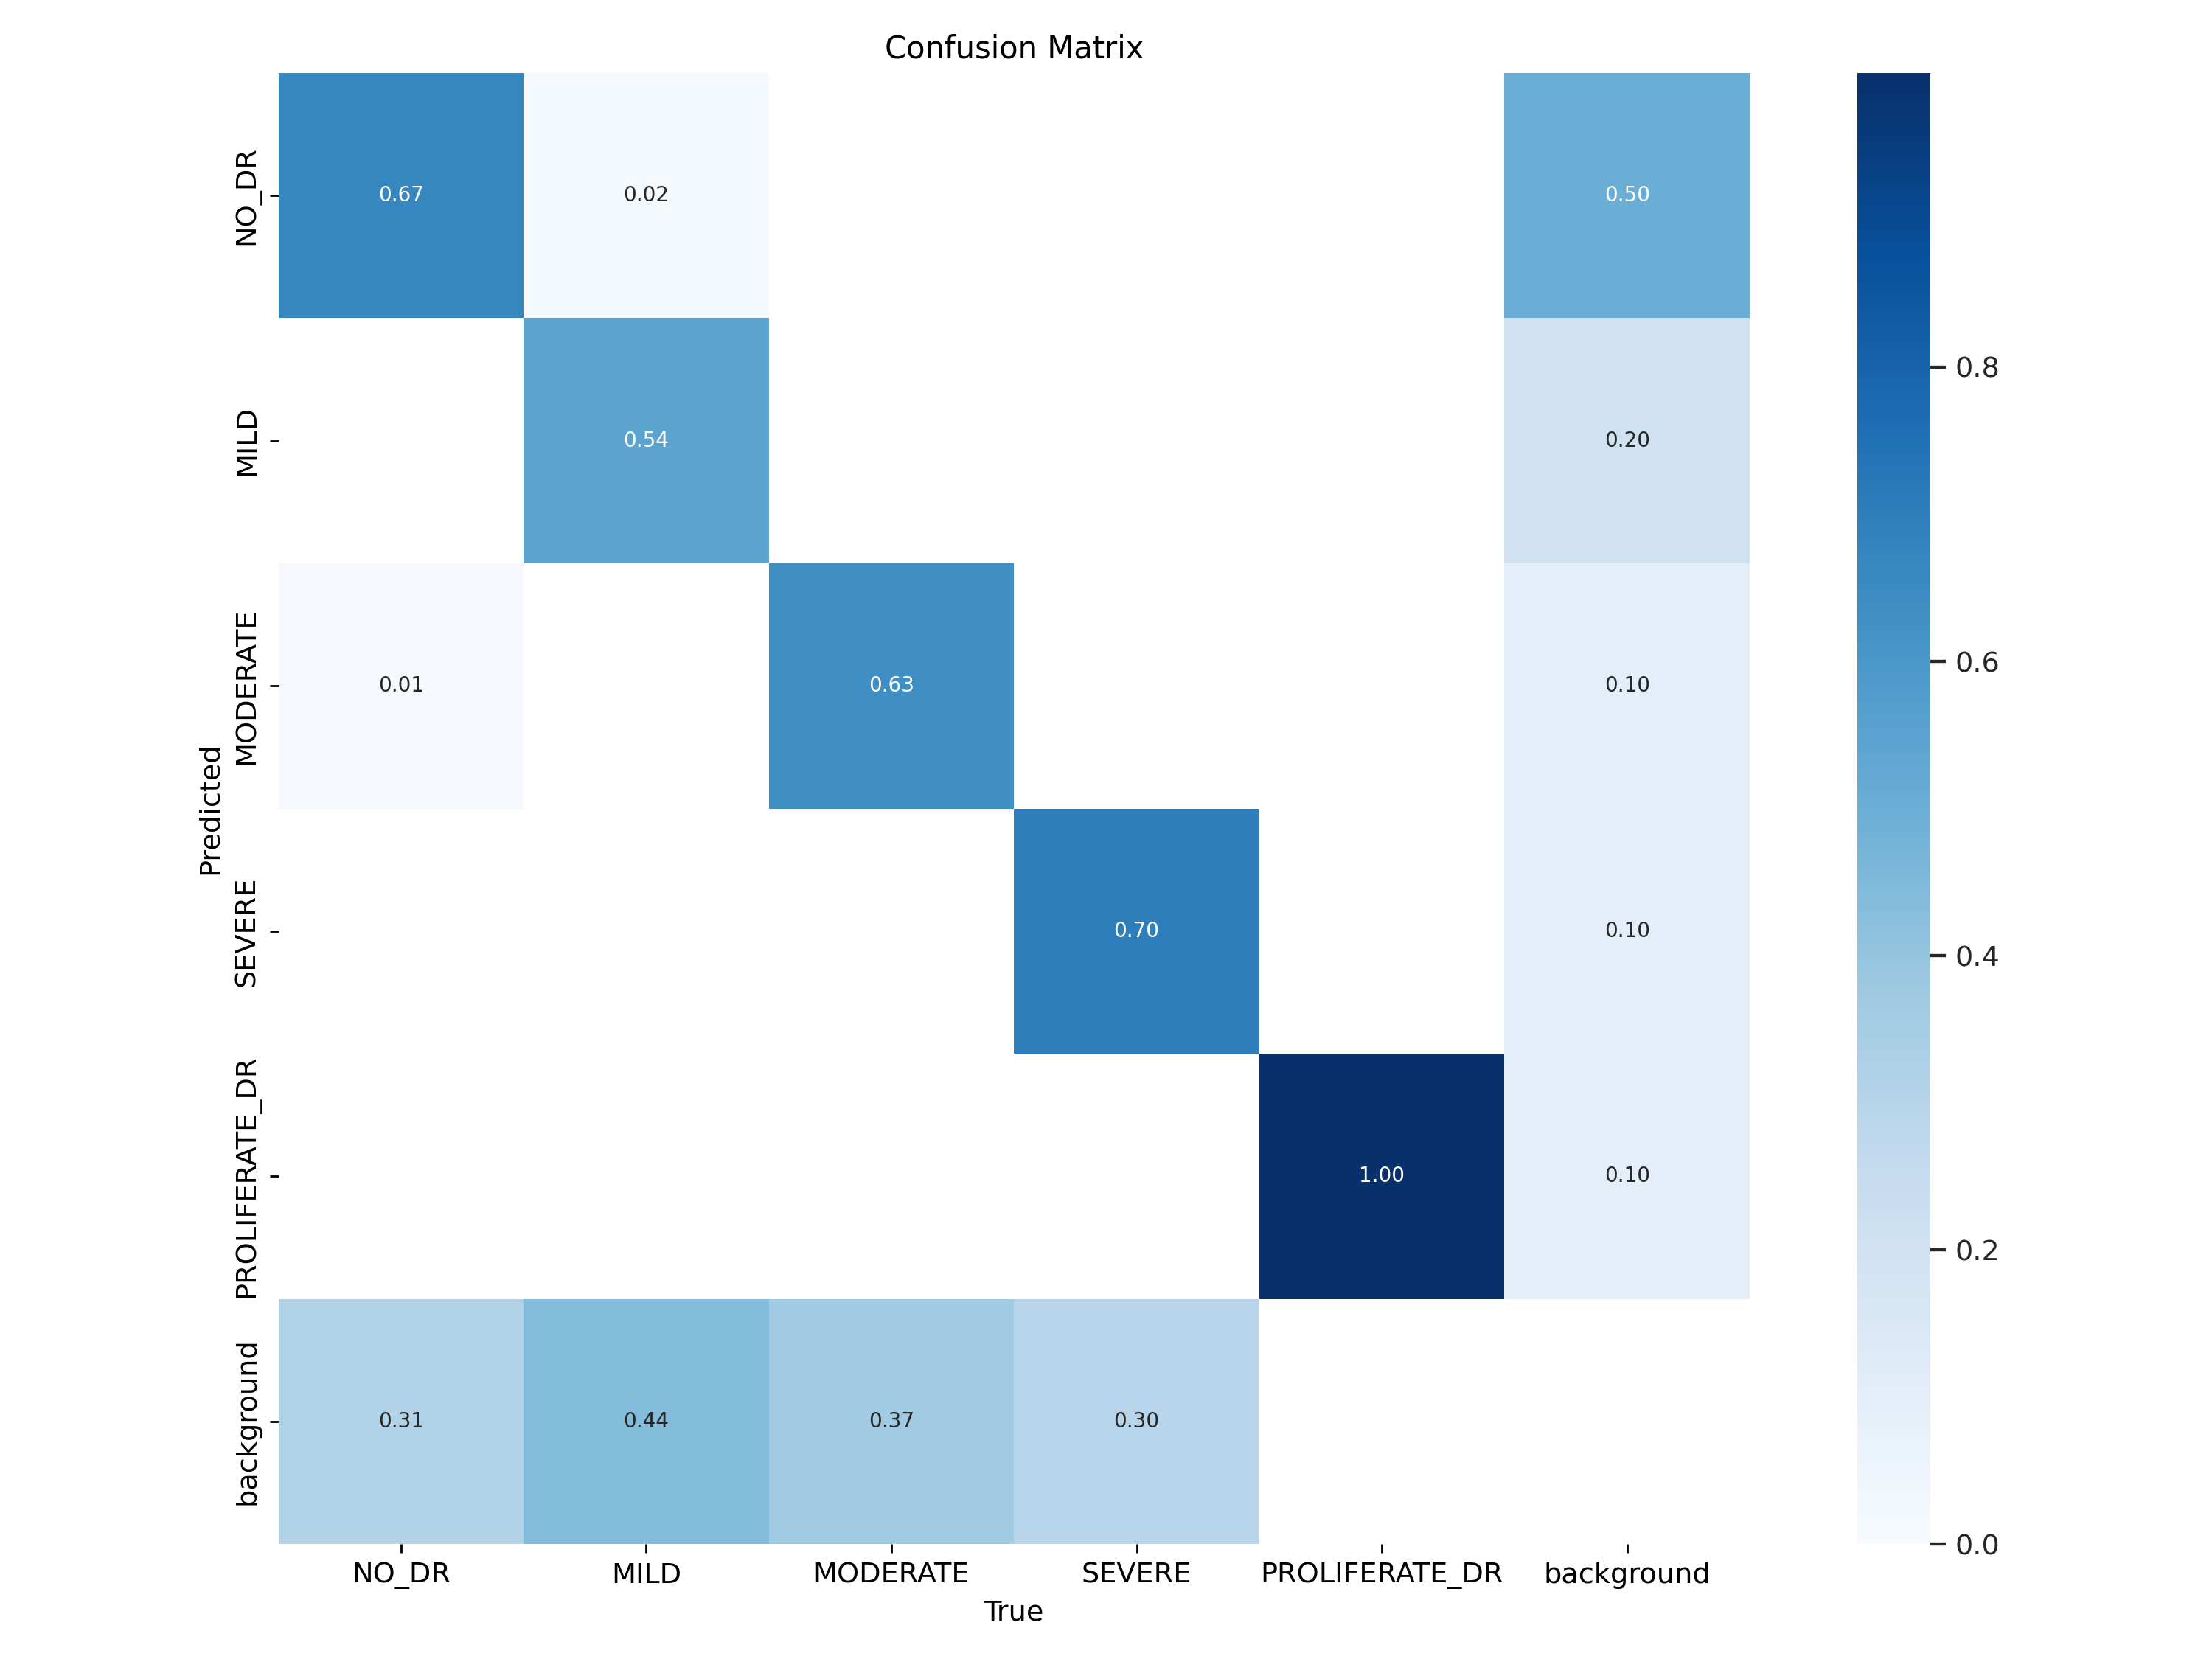

In [17]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename=os.path.join(directory,'runs/train/exp2/F1_curve.png'))
y = Image(filename=os.path.join(directory,'runs/train/exp2/PR_curve.png'))
z = Image(filename=os.path.join(directory,'runs/train/exp2/confusion_matrix.png'))
display(x, y,z)

# YOLO v8

In [ ]:
%cd ..

In [19]:
%mkdir v8

In [ ]:
%cd v8/

In [ ]:
directory = os.getcwd()
directory

In [22]:
!pip install ultralytics --quiet
!pip install -U ipywidgets --quiet

In [23]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
crs_path = r"content/drive/MyDrive/yolov8/images"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
    for filename in files:
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("Training images are : ",count_for_train)
print("Validation images are : ",count_for_val)

Training images are :  3297
Validation images are :  824


In [24]:
print(f"Total no. of images: {len(imgs)}")

Total no. of images: 4122


In [25]:
train_image_path = "train/images"
train_label_path = "train/labels"
val_image_path = "valid/images"
val_label_path = "valid/labels"

# Create directories if they don't exist
for folder in [train_image_path, train_label_path, val_image_path, val_label_path]:
    os.makedirs(folder, exist_ok=True)

In [26]:
files = list(zip(imgs, xmls))

# Copy files for train and test directories
for x in range(count_for_train):
    file_jpg, file_xml = choice(files)
    shutil.copy(os.path.join(crs_path, file_jpg), os.path.join(train_image_path, file_jpg))
    shutil.copy(os.path.join(crs_path, file_xml), os.path.join(train_label_path, file_xml))
    files.remove((file_jpg, file_xml))

for file_jpg, file_xml in files:
    shutil.copy(os.path.join(crs_path, file_jpg), os.path.join(val_image_path, file_jpg))
    shutil.copy(os.path.join(crs_path, file_xml), os.path.join(val_label_path, file_xml))
    
print(f"Train images:{len(os.listdir(train_image_path))}\nTrain labels:{len(os.listdir(train_label_path))}\nValidation images:{len(os.listdir(val_image_path))}\nValidation lables:{len(os.listdir(val_label_path))}")

Train images:3297
Train labels:3297
Validation images:825
Validation lables:825


In [ ]:
yaml_dir = shutil.copy('content/drive/MyDrive/yolov8/data.yaml',directory)
yaml_dir

In [28]:
with open(yaml_dir, 'r') as file:
    lines = file.readlines()
    print(lines)

['train: ../train/images\n', 'val: ../valid/images\n', 'test: ../test/images\n', '\n', 'nc: 5\n', "names: ['NO_DR', 'MILD', 'MODERATE', 'SEVERE', 'PROLIFERATE_DR']\n", '\n', 'roboflow:\n', '  workspace: diabeticretinopathy\n', '  project: diabeticretinopathyfinal\n', '  version: 3\n', '  license: CC BY 4.0\n', '  url: https://universe.roboflow.com/diabeticretinopathy/diabeticretinopathyfinal/dataset/3\n']


In [29]:
!wandb disabled
from ultralytics import YOLO
# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data=yaml_dir, epochs=25, imgsz=640,device = [0,1])  # train the model

W&B disabled.


100%|██████████| 49.7M/49.7M [00:00<00:00, 214MB/s]


Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                      CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/v8/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=

2024-04-13 20:09:54.003277: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 20:09:54.003336: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 20:09:54.004947: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

2024-04-13 20:10:04.522725: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 20:10:04.522791: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 20:10:04.524263: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=5
Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 72.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/v8/train/labels... 2625 images, 672 backgrounds, 0 corrupt: 100%|██████████| 3297/3297 [00:03<00:00, 1070.47it/s]


train: New cache created: /kaggle/working/v8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/v8/valid/labels... 153 images, 672 backgrounds, 0 corrupt: 100%|██████████| 825/825 [00:00<00:00, 1814.66it/s]


val: New cache created: /kaggle/working/v8/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      4.25G      2.038      4.121      2.199          1        640: 100%|██████████| 207/207 [01:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.47it/s]


                   all        825        153      0.412     0.0706     0.0094     0.0029

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      4.59G      1.903      3.282       2.03          4        640: 100%|██████████| 207/207 [01:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.68it/s]


                   all        825        153    0.00173      0.163    0.00386    0.00141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      4.59G      1.894      3.248      2.011          0        640: 100%|██████████| 207/207 [01:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.58it/s]


                   all        825        153      0.608     0.0501      0.013    0.00505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.59G       1.86      3.178      1.989          2        640: 100%|██████████| 207/207 [00:59<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.63it/s]


                   all        825        153      0.419      0.229     0.0269     0.0105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      4.57G      1.831      3.083      1.918          0        640: 100%|██████████| 207/207 [00:59<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.66it/s]


                   all        825        153      0.615      0.115     0.0271     0.0104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      4.55G      1.818      3.044      1.897          1        640: 100%|██████████| 207/207 [01:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.66it/s]


                   all        825        153      0.608     0.0897     0.0193    0.00853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      4.56G      1.789      2.975      1.894          1        640: 100%|██████████| 207/207 [00:59<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.60it/s]


                   all        825        153      0.426      0.168     0.0516     0.0184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      4.59G      1.779      2.957       1.88          1        640: 100%|██████████| 207/207 [00:59<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.70it/s]


                   all        825        153      0.611      0.195     0.0292      0.013

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      4.57G      1.713      2.939      1.836          0        640: 100%|██████████| 207/207 [01:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.71it/s]


                   all        825        153      0.421      0.187     0.0246     0.0109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.56G      1.706      2.899      1.842          1        640: 100%|██████████| 207/207 [00:59<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.70it/s]


                   all        825        153      0.226      0.142     0.0321     0.0118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      4.58G      1.711      2.906      1.853          0        640: 100%|██████████| 207/207 [00:59<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.63it/s]


                   all        825        153      0.427       0.18     0.0288     0.0131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      4.59G      1.686       2.82      1.832          2        640: 100%|██████████| 207/207 [00:59<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.66it/s]


                   all        825        153      0.425       0.21     0.0312     0.0146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      4.56G      1.656      2.821      1.819          1        640: 100%|██████████| 207/207 [01:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.71it/s]


                   all        825        153       0.43      0.204     0.0324     0.0134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      4.57G      1.682      2.825      1.822          1        640: 100%|██████████| 207/207 [00:59<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.65it/s]


                   all        825        153      0.228      0.242     0.0353     0.0153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      4.58G      1.635      2.785      1.785          0        640: 100%|██████████| 207/207 [00:59<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.69it/s]


                   all        825        153      0.424       0.21     0.0309     0.0131
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      4.58G      1.783      2.625      1.934          1        640: 100%|██████████| 207/207 [01:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.61it/s]


                   all        825        153       0.43      0.242      0.044     0.0219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      4.57G      1.737      2.574      1.905          1        640: 100%|██████████| 207/207 [00:59<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.65it/s]


                   all        825        153       0.43      0.246     0.0459     0.0211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      4.57G      1.728      2.542      1.881          1        640: 100%|██████████| 207/207 [00:59<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.65it/s]


                   all        825        153       0.23      0.241     0.0498     0.0243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      4.58G      1.717      2.456      1.873          1        640: 100%|██████████| 207/207 [00:59<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.71it/s]


                   all        825        153      0.433      0.105       0.05     0.0241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      4.59G      1.705      2.409      1.869          1        640: 100%|██████████| 207/207 [00:59<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.69it/s]


                   all        825        153      0.236      0.233     0.0502     0.0251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      4.57G      1.678       2.37       1.85          1        640: 100%|██████████| 207/207 [00:59<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.65it/s]


                   all        825        153      0.439      0.194     0.0506     0.0246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      4.56G      1.676      2.376      1.851          1        640: 100%|██████████| 207/207 [00:59<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.63it/s]


                   all        825        153     0.0296      0.271     0.0549     0.0292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      4.58G      1.652      2.305      1.836          0        640: 100%|██████████| 207/207 [00:59<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.68it/s]


                   all        825        153      0.443      0.203       0.05     0.0258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      4.56G      1.623      2.283      1.823          1        640: 100%|██████████| 207/207 [00:59<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.70it/s]


                   all        825        153      0.451      0.197     0.0546     0.0288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      4.55G       1.62      2.273      1.819          1        640: 100%|██████████| 207/207 [00:59<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.67it/s]


                   all        825        153      0.234        0.3     0.0563     0.0305

25 epochs completed in 0.506 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                      CUDA:1 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  4.76it/s]


                   all        825        153      0.233      0.296      0.056     0.0304
                 NO_DR        825         61     0.0787      0.656      0.123     0.0604
                  MILD        825         48     0.0539      0.562     0.0692      0.038
              MODERATE        825         19      0.034      0.263     0.0255      0.015
                SEVERE        825         17          0          0      0.018    0.00866
        PROLIFERATE_DR        825          8          1          0     0.0442       0.03
Speed: 0.2ms preprocess, 10.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


In [30]:
results = model.val()

Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                      CUDA:1 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/working/v8/valid/labels.cache... 153 images, 672 backgrounds, 0 corrupt: 100%|██████████| 825/825 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▌         | 3/52 [00:03<00:45,  1.08it/s]Exception in thread Thread-10 (plot_images):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/utils/plotting.py", line 909, in plot_images
    annotator.im.save(fname)  # save
  File "/opt/conda/lib/python3.10/site-packages/PIL/Image.py", line 2432, in save
    if not format:
  File "/opt/conda/lib/python3.10/site-packages/PIL/JpegImagePlugin.py", line 824, in _save
Exception in thread Thread-9 (plot_images):
Traceback (most recent call last):
  File "/opt/conda/lib/pyt

                   all        825        153      0.234        0.3      0.056     0.0304
                 NO_DR        825         61      0.079      0.656      0.122     0.0594
                  MILD        825         48     0.0566      0.583     0.0693      0.038
              MODERATE        825         19     0.0362      0.263     0.0259     0.0153
                SEVERE        825         17          0          0     0.0179    0.00869
        PROLIFERATE_DR        825          8          1          0     0.0453     0.0307
Speed: 0.3ms preprocess, 24.0ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train2


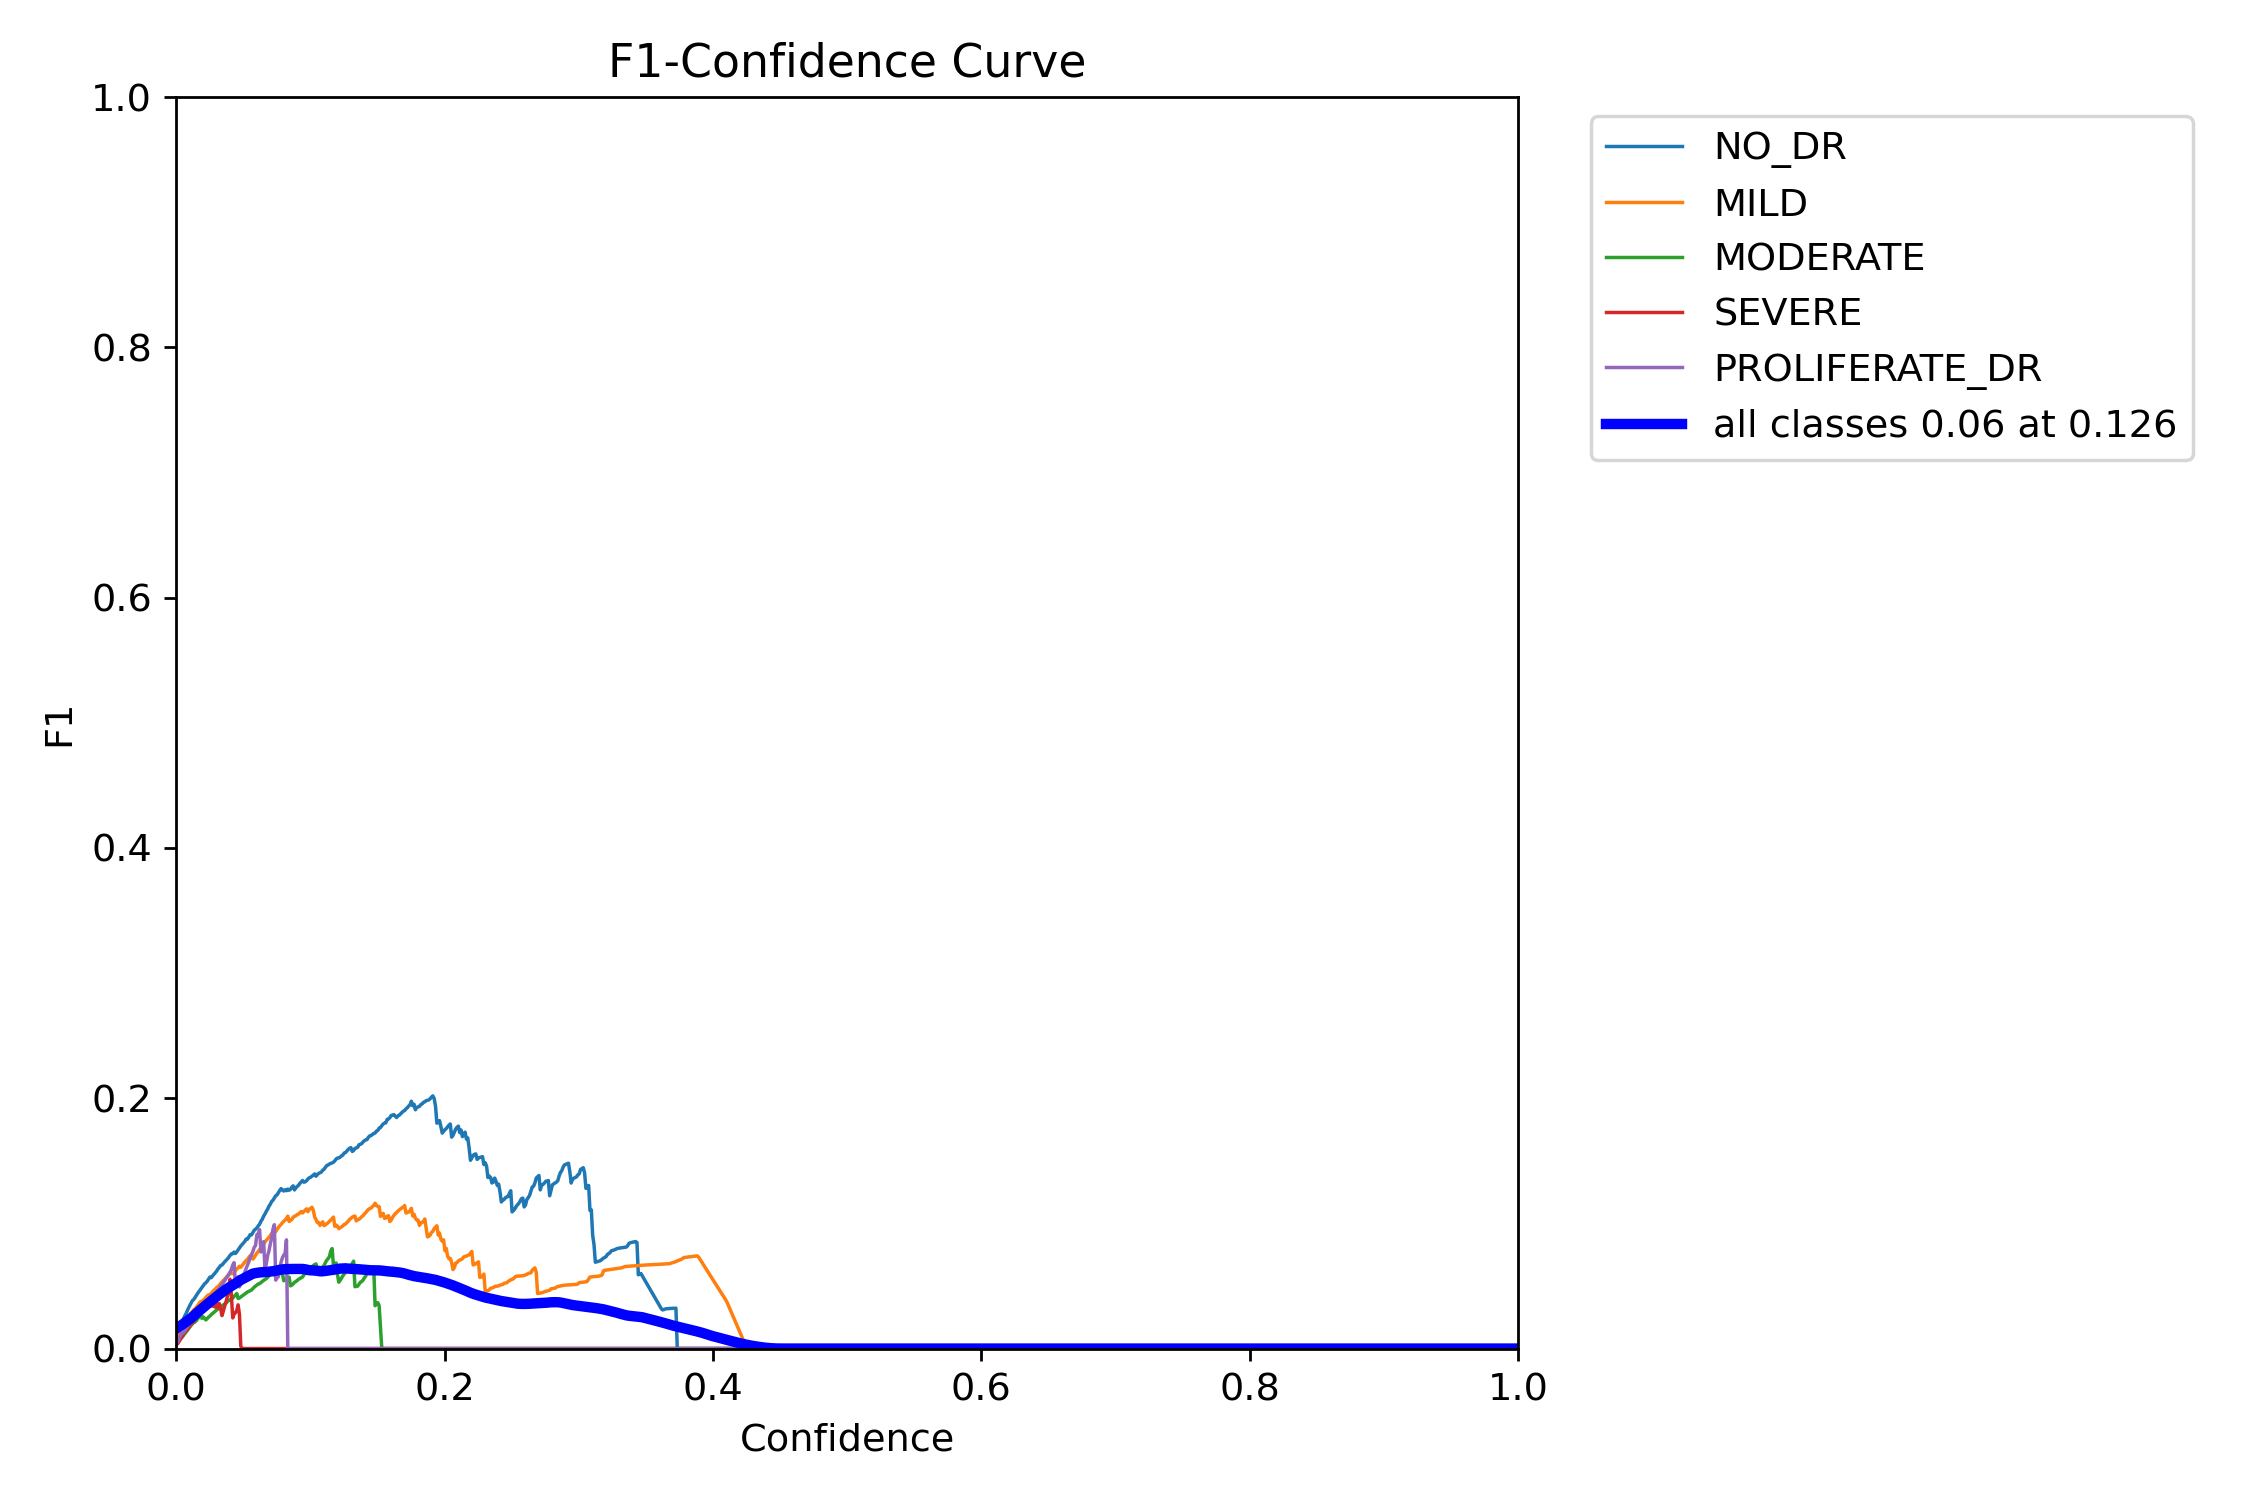

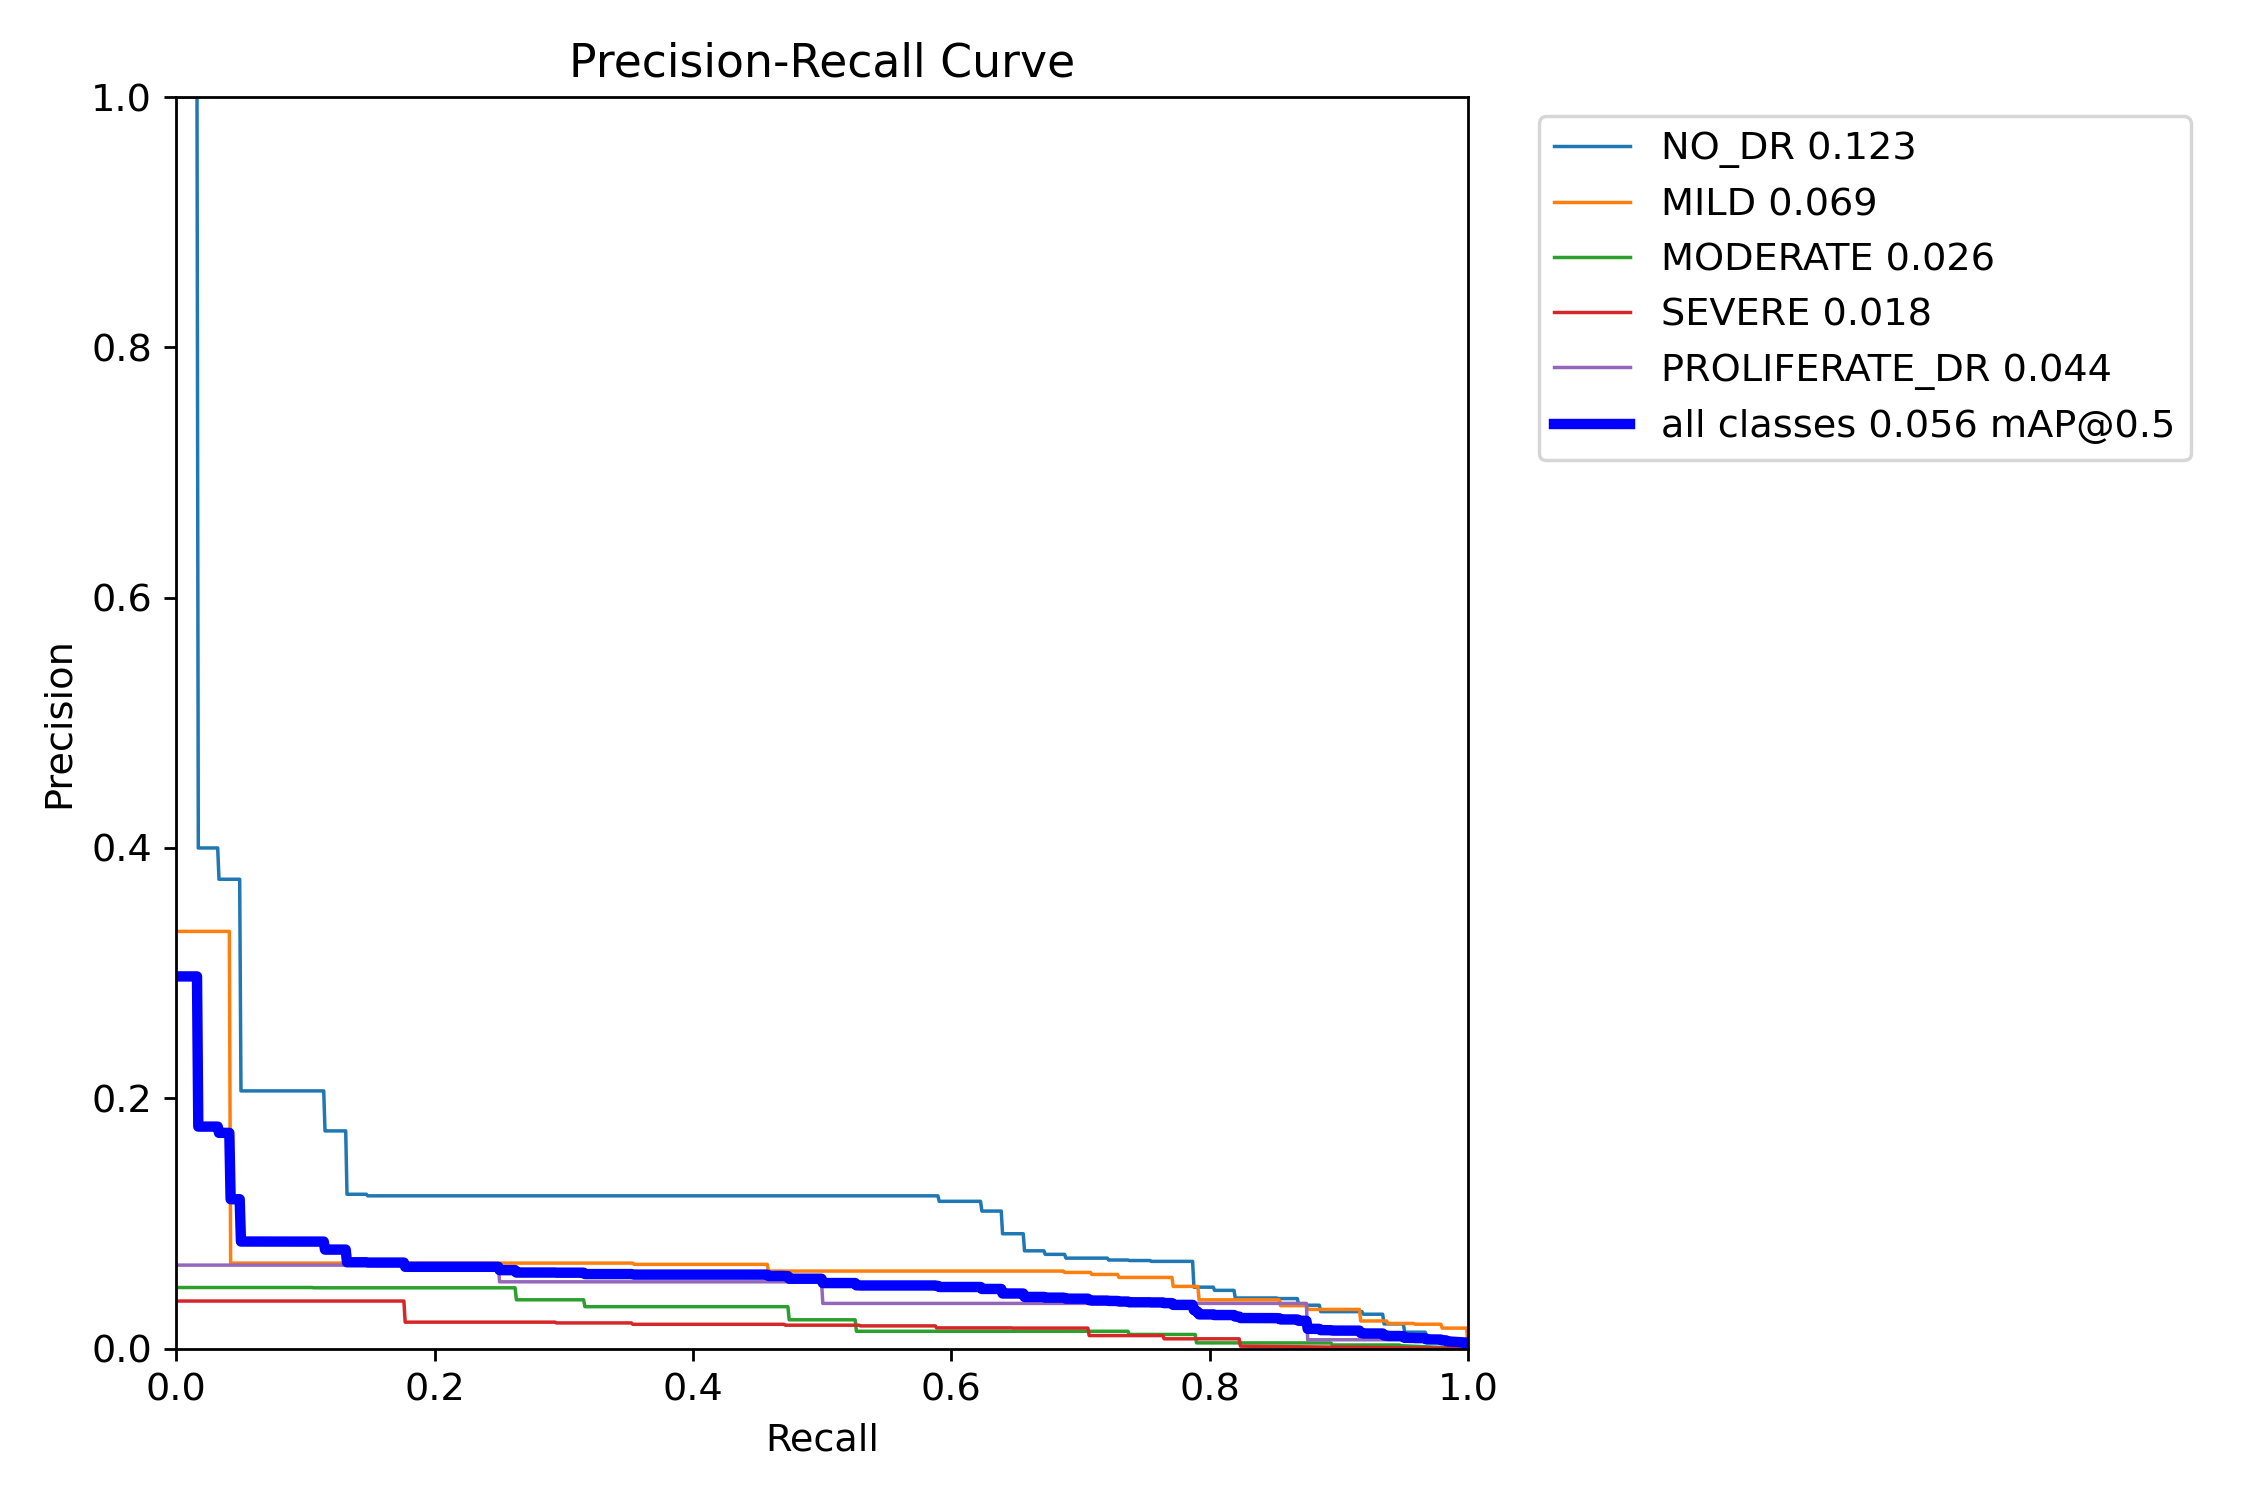

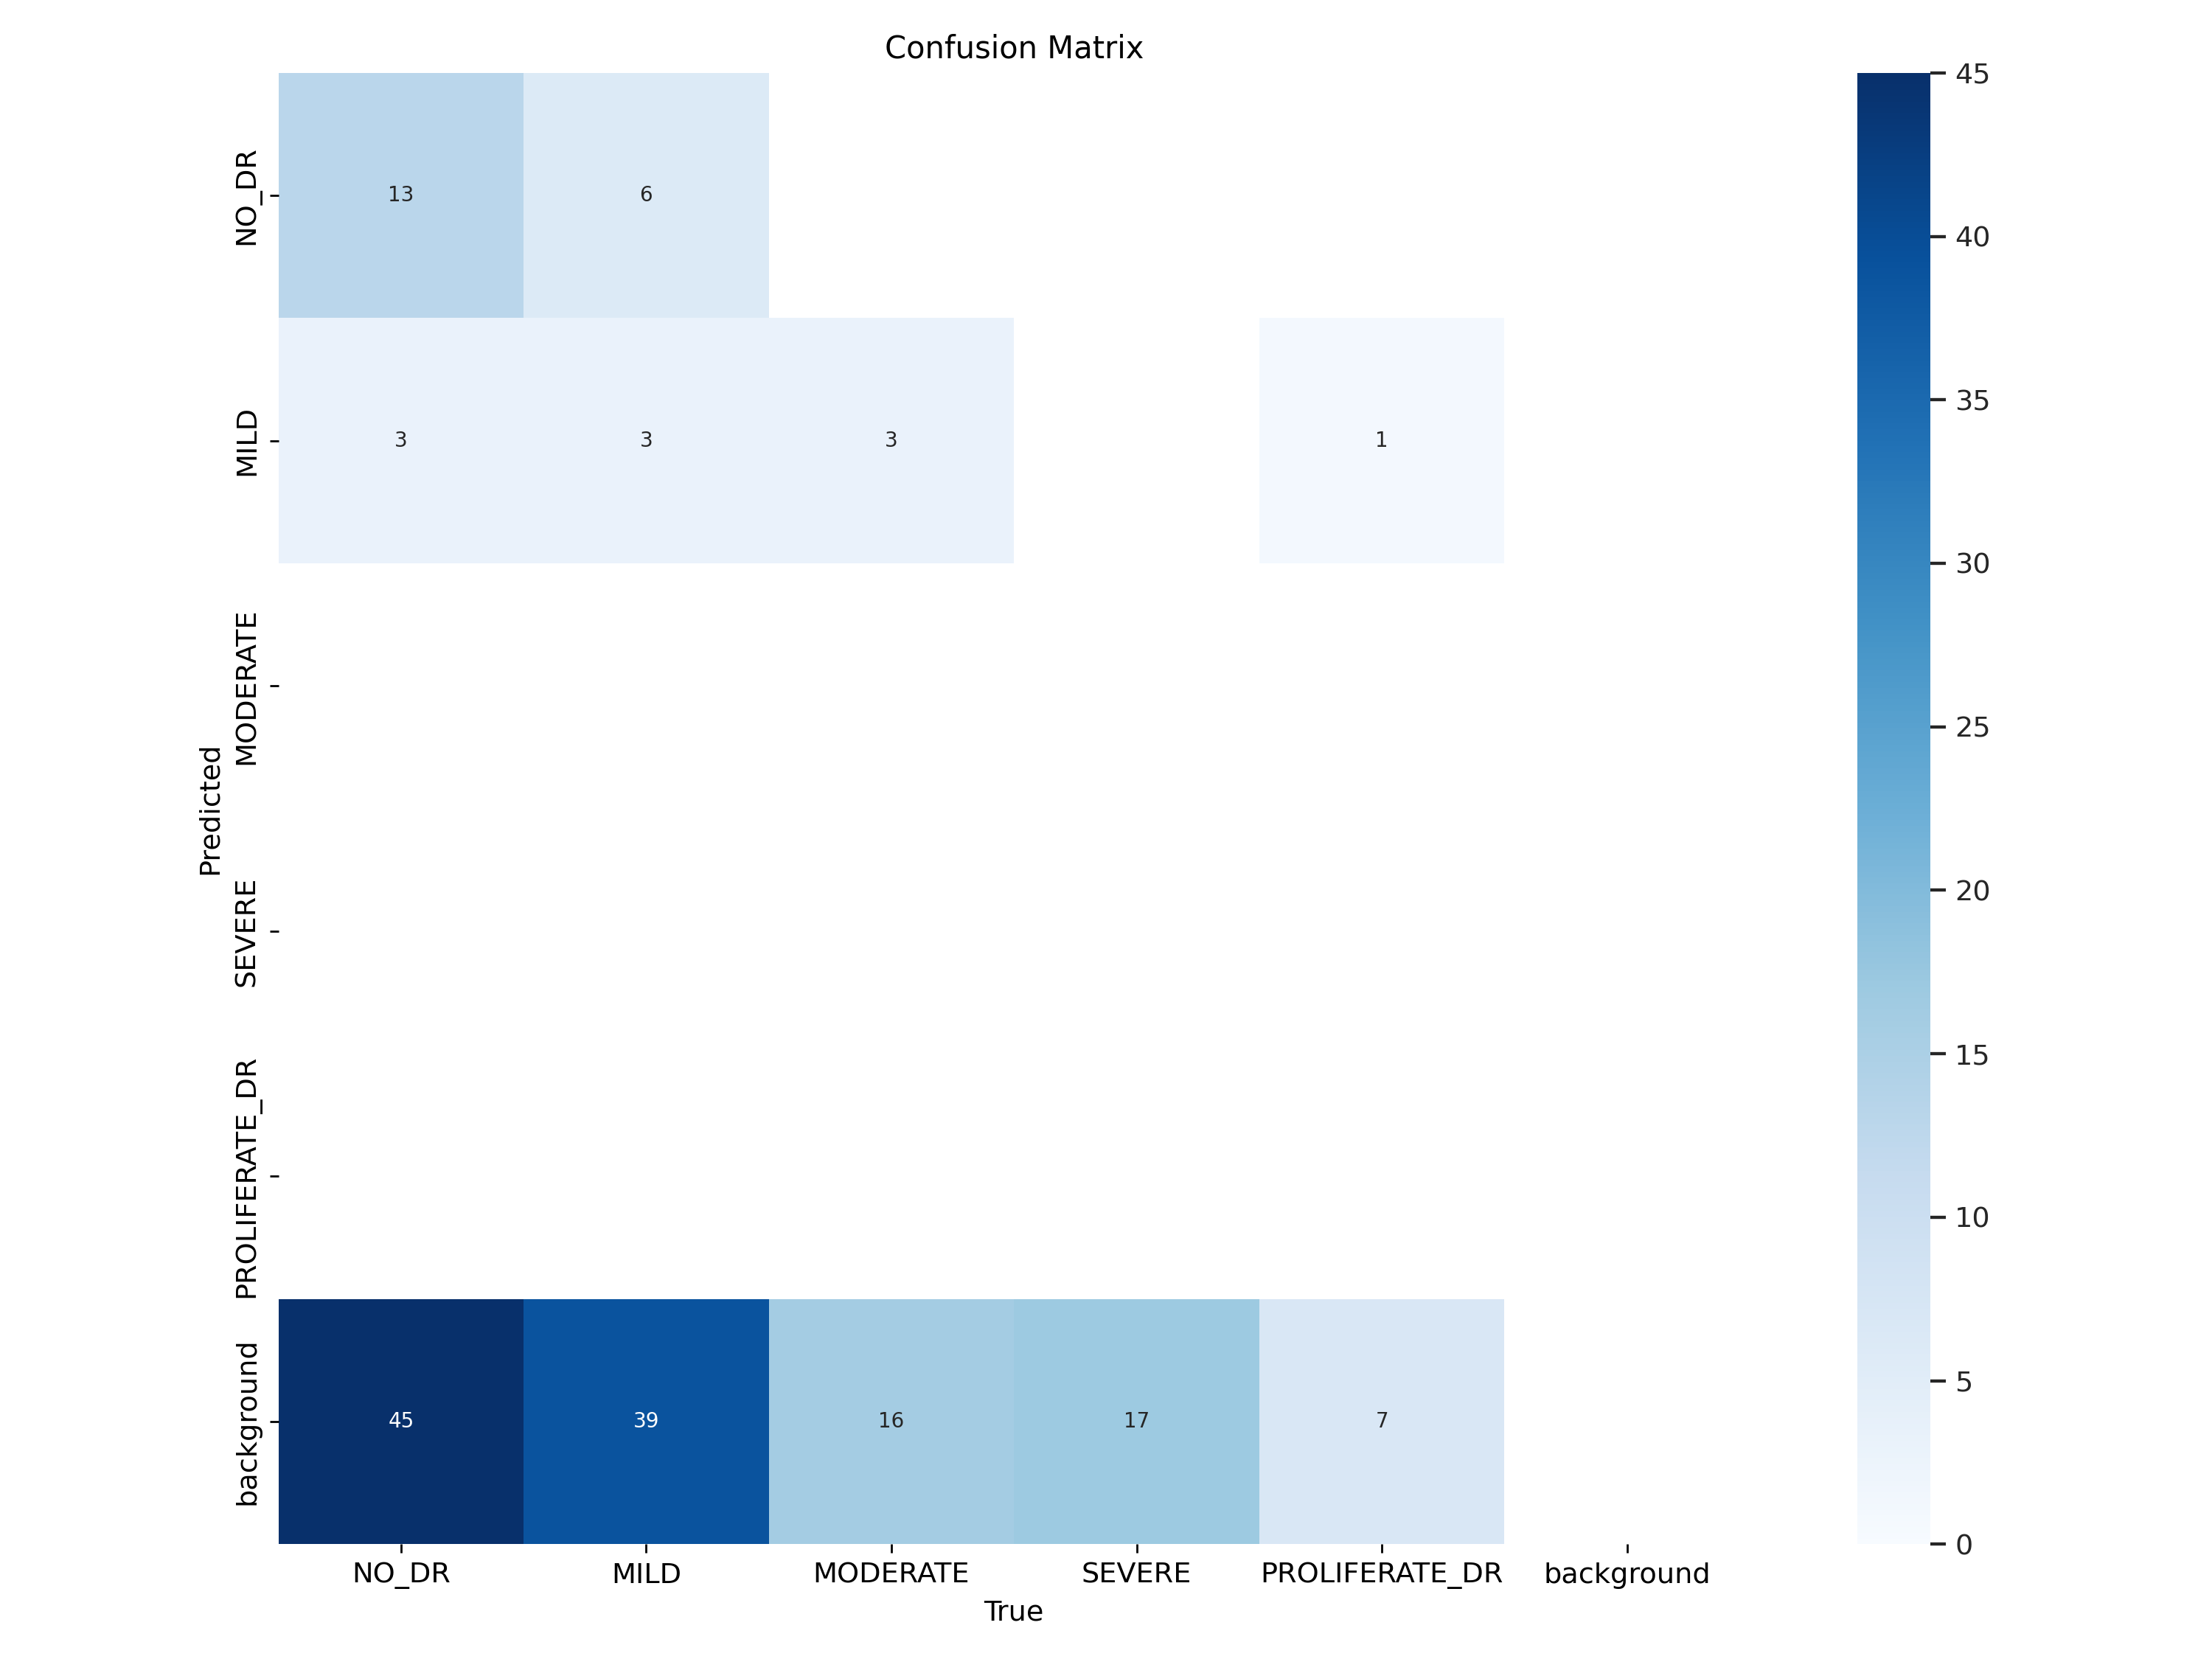

In [31]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train/F1_curve.png')
y = Image(filename='runs/detect/train/PR_curve.png')
z = Image(filename='runs/detect/train/confusion_matrix.png')
display(x, y,z)